### Comparing our results to demographics-normalized cognitive test sums

In [15]:
import numpy as np
import pandas as pd
import pickle
import h5py
from processing_helper_functions import final_processing
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Variables to choose which downsampling technique, time series encoding technique, and other settings to use

# Which year of past data you would like to train on. One of: 0, 1, 2 where 0 is most recent and 2 is least recent
# If you want to train on more than one year, enter the least recent year to include
years_data = 0
# Set to True if you want to only train on 1 year of data
# Set to False to train on all data through years variable above
only_one = True
# Which time encoding technique should be used
# One of: 'all', 'slopes', 'all_ma', 'sma', 'ema'
encode_method = 'all'
# Which set of features should be used
# One of: 'baseline_demographics_cols', 'baseline_mci_cols', 'baseline_mmse30_cols', 'baseline_linear_selected_features',
# 'simplified_cols_withapoe', 'simplified_cols_withoutapoe', 'all_cols', 'controlled_cog'
feature_set = 'simplified_cols_withoutapoe'
feature_set = 'all_cols'

# Which downsampling technique should be used
# One of: 'randdownsample', 'matcheddownsample', 'train', 'weighted'
sample_type = "train"

# NEW PART:
demo_normed_pred = True

In [5]:
encode_suffix = encode_method
if encode_method in ['all','current']:
    encode_suffix = str(years_data+1)
if encode_method == 'ema':
    encode_suffix = encode_method+str(half_life)
if only_one:
    save_suffix = '%s_%s_2yrprev_within3_singleyear%s'%(sample_type, feature_set, str(int(encode_suffix)-1))
else:
    save_suffix = '%s_%s_2yrprev_within3_yrsincluded%s'%(sample_type, feature_set, encode_suffix)

file_suffix = "2yrprev_within3"
if demo_normed_pred:
    with h5py.File("../DATA/PROCESSED/standardized_demographics_stacked_imputed/%s.h5"%file_suffix, 'r') as hf:
        ALL_SAMPLES = hf["samples"][:]
        ALL_FEATURES_TIME = hf["features"][:]
    DATA = pd.read_csv("../DATA/PROCESSED/standardized/merged_kept_data_%s.csv"%file_suffix, index_col=0)
    ALL_SAMPLES_df = pd.DataFrame(ALL_SAMPLES, columns=["projid","fu_year","onset_label_time","onset_label_time_binary"])
    constructed_data = final_processing(encode_method, years_data, only_one, feature_set, DATA.columns[6:], ALL_FEATURES_TIME)
else:
    with h5py.File("../DATA/PROCESSED/standardized_stacked_imputed/%s.h5"%file_suffix, 'r') as hf:
        ALL_SAMPLES = hf["samples"][:]
        ALL_FEATURES_TIME = hf["features"][:]
    DATA = pd.read_csv("../DATA/PROCESSED/standardized/merged_kept_data_%s.csv"%file_suffix, index_col=0)
    ALL_SAMPLES_df = pd.DataFrame(ALL_SAMPLES, columns=["projid","fu_year","onset_label_time","onset_label_time_binary"])
    constructed_data = final_processing(encode_method, years_data, only_one, feature_set, DATA.columns[6:], ALL_FEATURES_TIME)

C:\Users\nbbwang\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\nbbwang\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\nbbwang\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained 

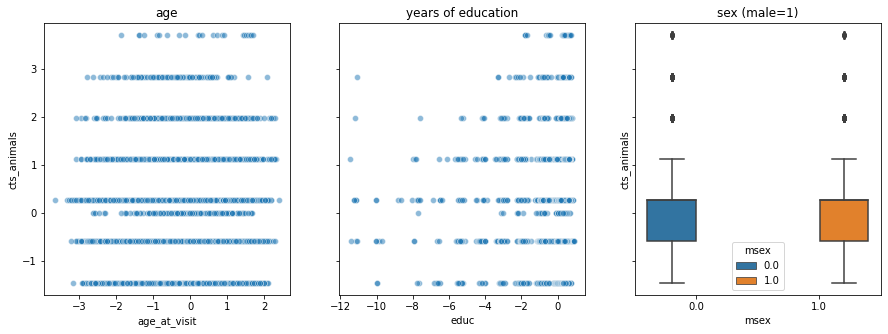

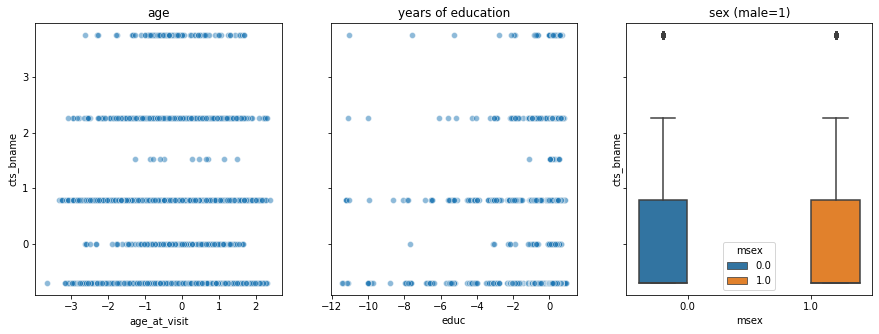

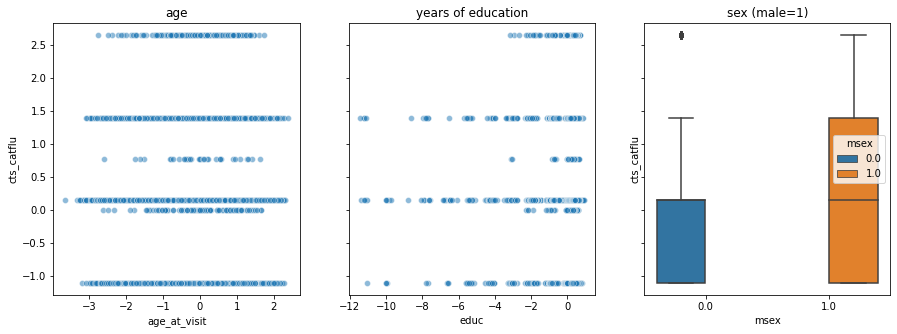

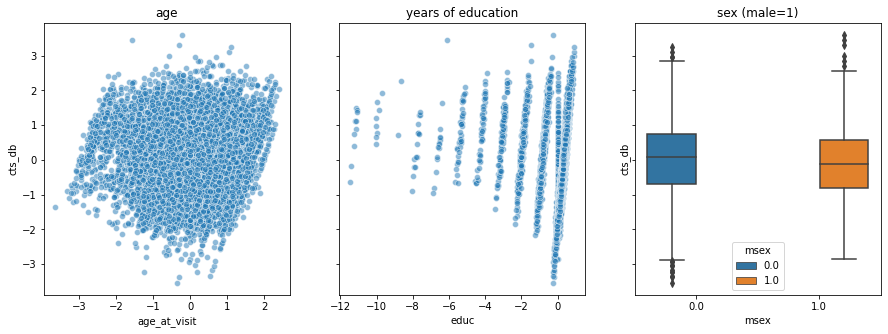

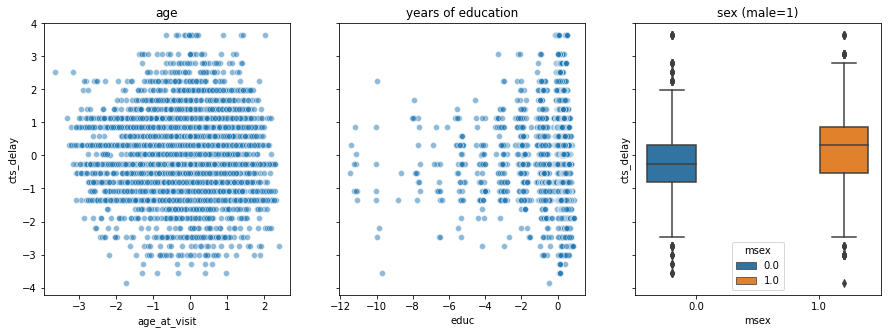

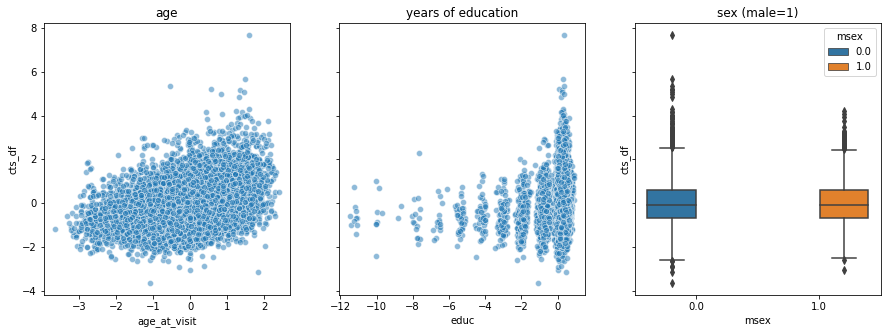

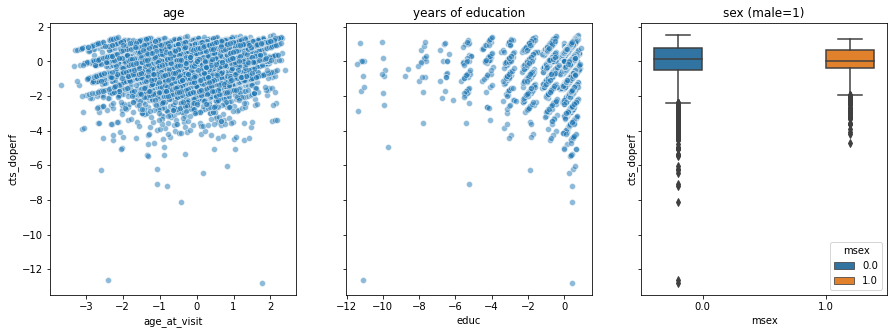

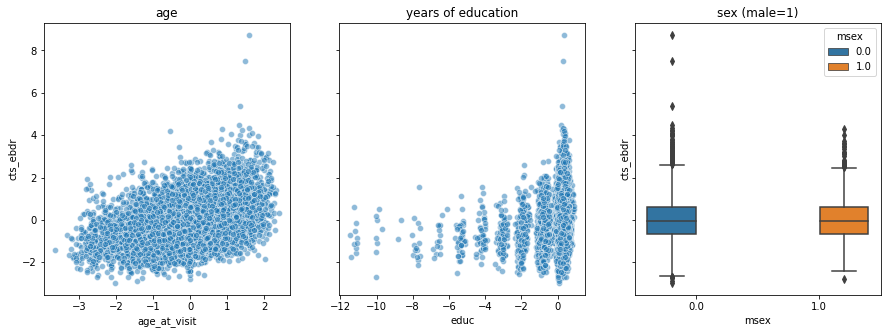

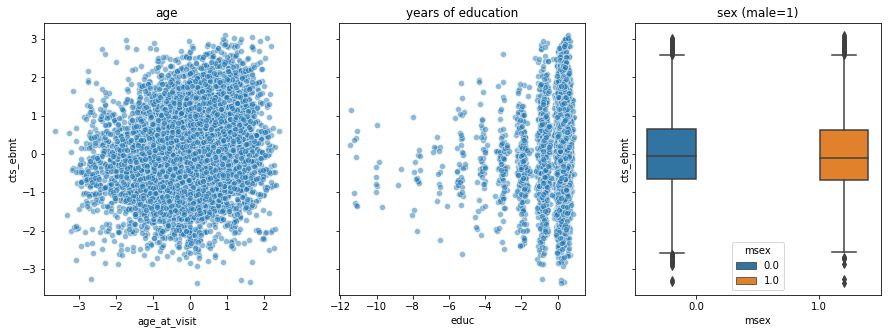

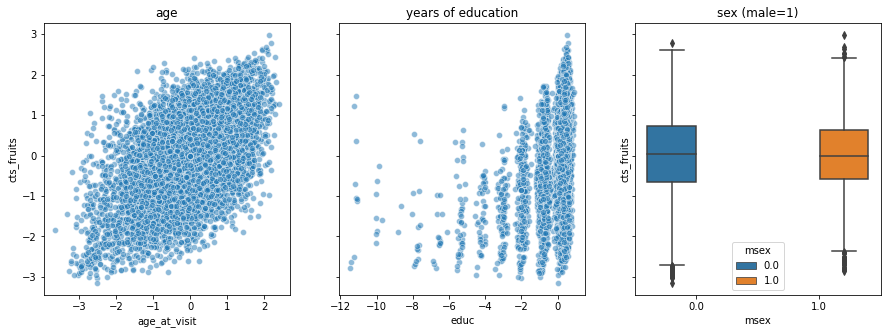

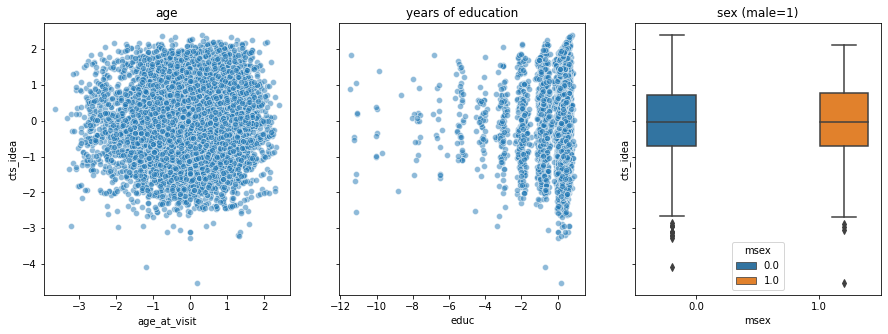

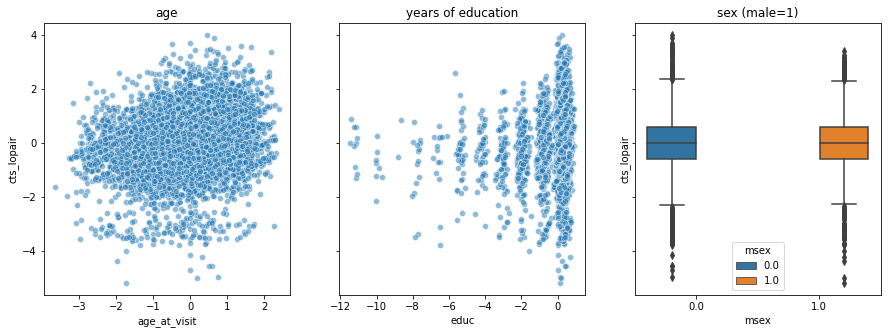

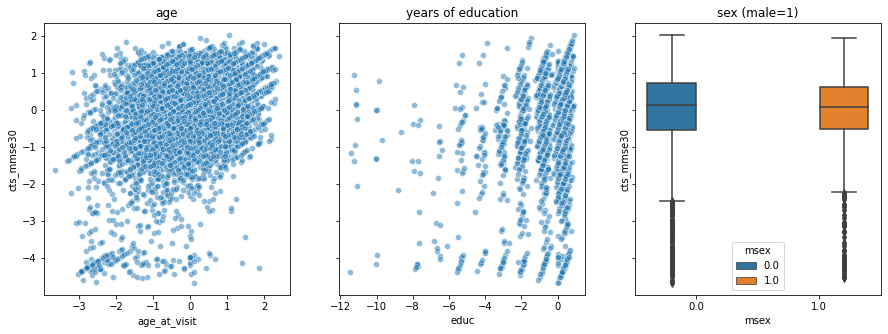

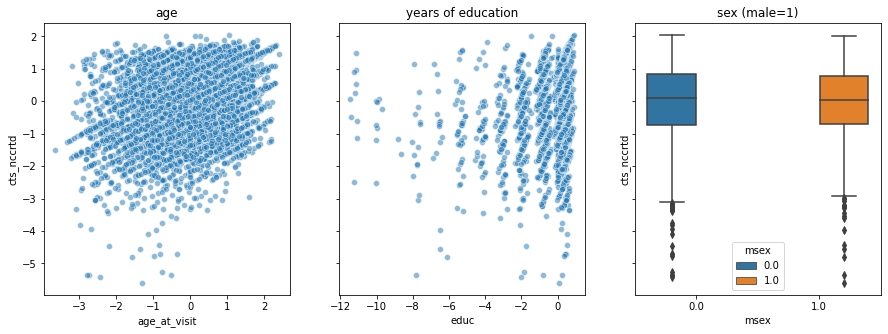

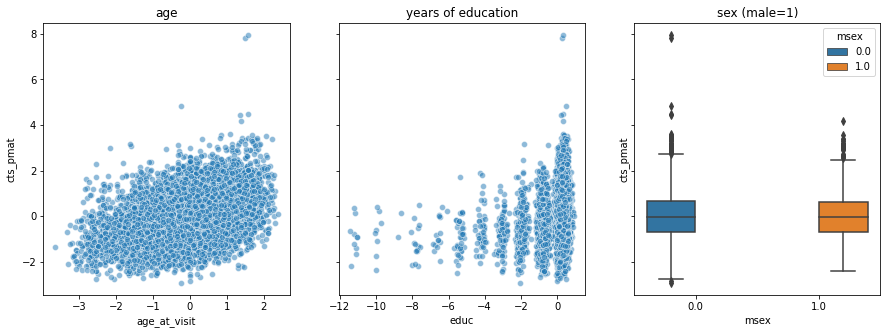

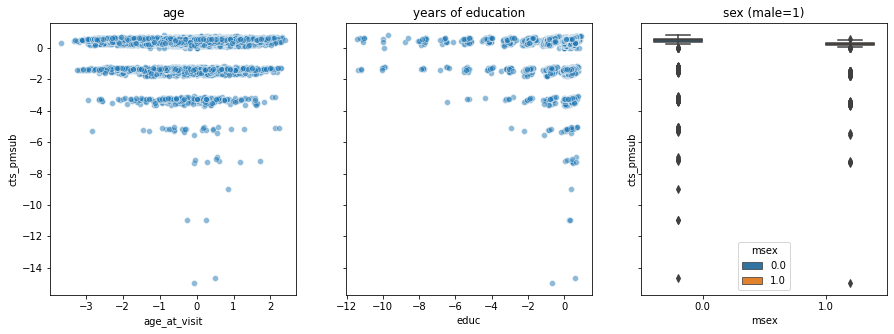

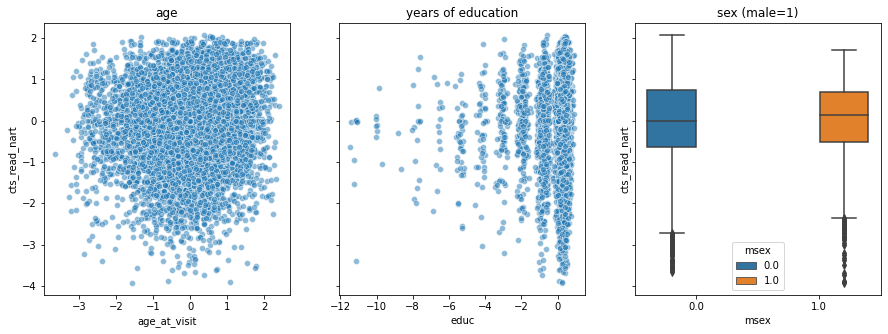

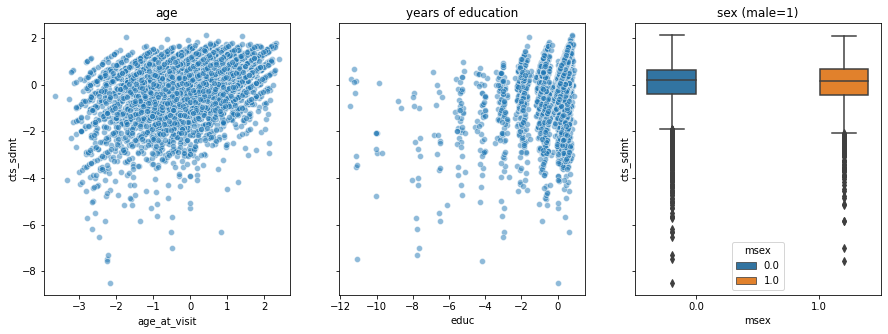

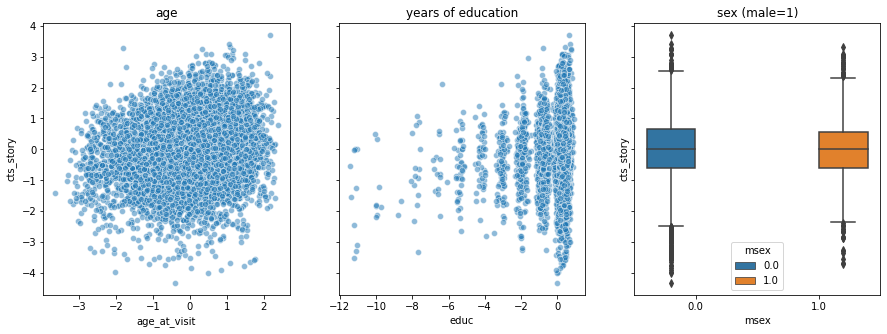

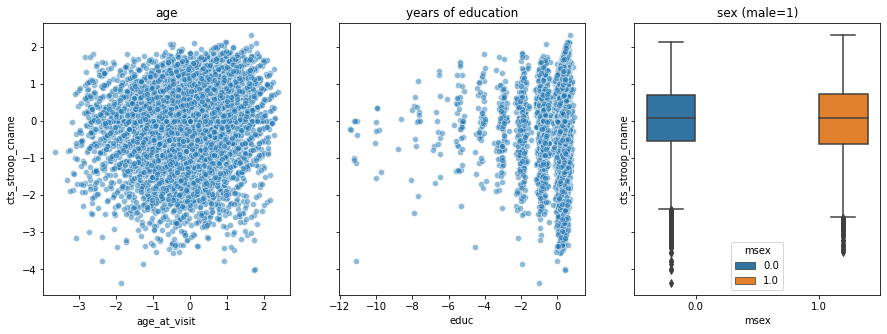

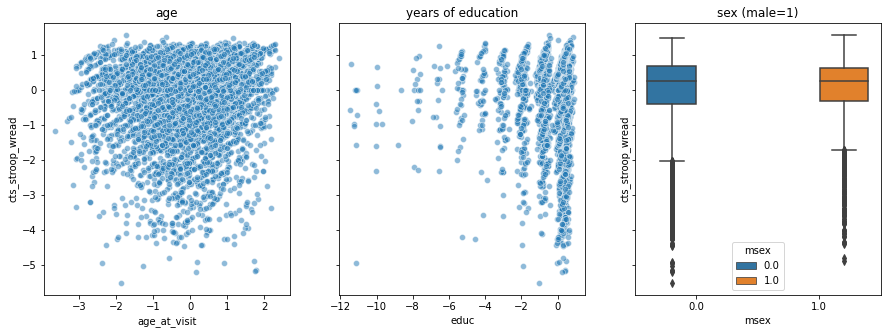

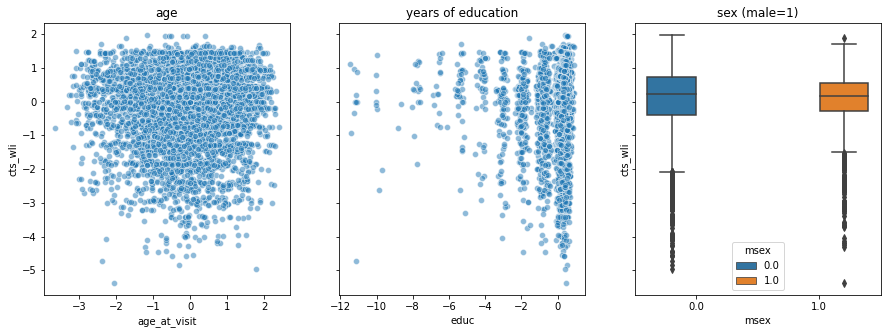

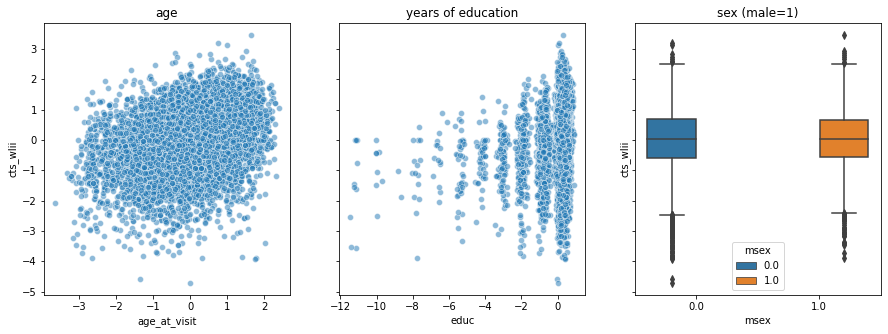

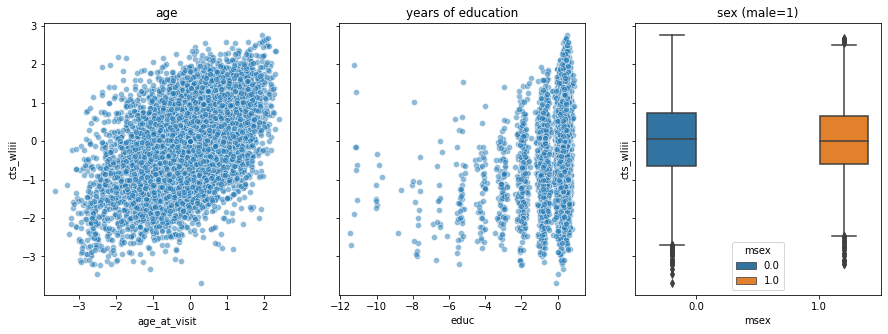

In [17]:
for var in constructed_data.columns:
    if "cts_" in var:
    
        f,ax = plt.subplots(1,3,figsize=(15,5), sharey=True)

        sns.scatterplot(x = 'age_at_visit', y=var,  data=constructed_data, alpha=.5, ax=ax[0])
        ax[0].set_title("age")
        sns.scatterplot(x = 'educ', y=var,  data=constructed_data, alpha=.5, ax=ax[1])
        ax[1].set_title("years of education")
        sns.boxplot(x = 'msex', y=var,  hue='msex', data=constructed_data, ax=ax[2])
        ax[2].set_title("sex (male=1)")

# Train Models

In [18]:
just_cog_df = constructed_data[constructed_data.columns[["cts_" in x for x in constructed_data.columns]]]

In [19]:
constructed_data["normed_cog_sum"] = just_cog_df.sum(axis=1)

1.5126377087678242e-15 0.9897308602121936
3.0628398129640292e-15 0.9897308602122582
-3.3107404303267767e-15 0.9942159428898792
1.5326517259424906e-15 0.9999999999999986
-6.8455012552082596e-15 0.9993406592690196
-5.907854917372578e-17 0.9991207823335823
1.0133544497258343e-16 0.9839980815740248
2.0148175729767754e-17 0.9991207823335823
5.4931830197865596e-17 0.9977454536768667
-4.01820117818923e-17 0.988064551953343
1.2967339067967506e-16 0.9985708781792418
3.6658825181446386e-17 0.9942159428898463
3.21126795983526e-17 0.9970295330162945
1.6099026612163096e-18 0.9978005032205458
-1.2013288797712614e-17 0.9989008569991251
1.5513607462629892e-17 0.9988458680994114
7.695822569905238e-18 0.979297961510404
2.5075453571672216e-17 0.9895088479033896
4.619932788399531e-17 0.9795222881566897
-3.92718679478524e-18 0.9718661344897893
2.846600614605202e-17 0.978624673042014
6.390825715737471e-17 0.979802624239861
2.194102187521319e-17 0.9781755566011765
-6.304842278149783e-17 0.9885647393446958


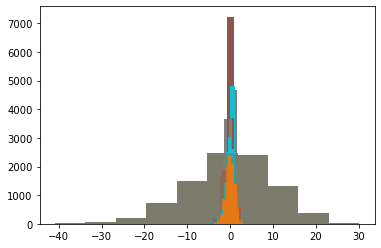

In [20]:
for var in constructed_data.columns:
    if "cts_" in var:
        plt.hist(constructed_data[var])
        print(np.mean(constructed_data[var]), np.std(constructed_data[var]))
        
    plt.hist(constructed_data["normed_cog_sum"],alpha=.1)
#         tmp =  (constructed_data[var]-np.mean(constructed_data[var]))/np.std(constructed_data[var])
#         print(np.mean(tmp), np.std(tmp))
#         plt.hist(tmp)


### Linear model based on only the sum over normalized (over age,sex,edu) cognitve test scores

In [70]:
# Linear
accuracy_save = []
roc_auc_save = []
pr_auc_save = []
precision_save = []
recall_save = []
fpr_save = []
tpr_save = []

if sample_type in ['randdownsample','matcheddownsample']:
    train_samples_df = pd.read_csv("../DATA/PROCESSED/split_projids/%s_train_%s.txt"%(sample_type,file_suffix),index_col=0).drop_duplicates()
    train_samples_df["keep"]=1
    data_train = pd.merge(DATA, train_samples_df, on=['projid','fu_year'], how='left')
    train_idx = (data_train["keep"]==1).values
else:
    train_idx =ALL_SAMPLES_df["projid"].isin(np.loadtxt("../DATA/PROCESSED/split_projids/train_%s.txt"%(file_suffix))).values
valid_idx =ALL_SAMPLES_df["projid"].isin(np.loadtxt("../DATA/PROCESSED/split_projids/test_%s.txt"%(file_suffix))).values

label_col = np.where(ALL_SAMPLES_df.columns.values=='onset_label_time_binary')[0][0]
label_tr = ALL_SAMPLES[train_idx][:, label_col]
label_val = ALL_SAMPLES[valid_idx][:, label_col] 
data_tr = constructed_data[train_idx][["normed_cog_sum"]]
data_val = constructed_data[valid_idx][["normed_cog_sum"]]

if sample_type == 'weighted':
    weight_tr = label_tr.astype(float)
    weight_tr_val = np.sum(weight_tr)/(weight_tr.shape[0]-np.sum(weight_tr))
    clf = LogisticRegression(class_weight={0: weight_tr_val, 1: 1})
else:
    clf = LogisticRegression()
clf.fit(data_tr, label_tr)

accuracy_save.append(clf.score(data_val, label_val))
roc_auc_save.append(metrics.roc_auc_score(label_val, clf.decision_function(data_val)))
pr_auc_save.append(metrics.average_precision_score(label_val, clf.decision_function(data_val)))   
fpr_save, tpr_save, _ = metrics.roc_curve(label_val, clf.decision_function(data_val))
precision_save, recall_save, _ = metrics.precision_recall_curve(label_val, clf.decision_function(data_val))

new_results = [accuracy_save,roc_auc_save,pr_auc_save,precision_save,recall_save,fpr_save,tpr_save]

if demo_normed_pred:
    pickle.dump(new_results, open('../results/normed_cog_sum_2yrprev_within3_singleyear0.p', 'wb'))
    pickle.dump(clf, open('../results/normed_cog_sum_2yrprev_within3_singleyear0.dat', "wb"))
    
else:
    pickle.dump(new_results, open('../results/normed_cog_sum_%s.p'%(save_suffix), 'wb'))
    pickle.dump(clf, open('../results/normed_cog_sum_%s.dat'%(save_suffix), "wb"))

In [79]:
pickle.dump(clf.predict_proba(data_val)[:,1],  open('normed_cog_sum_2yrprev_within3_singleyear0_TEST_PRED_PROBS.p', 'wb'))
pickle.dump(label_val,  open('TEST_LABELS.p', 'wb'))